# 📊 nuScenes Dataset Exploration
## Understanding Multi-View Camera Setup

In this notebook we'll:
1. Load the nuScenes dataset
2. Visualize the 6-camera surround view
3. Understand camera calibration
4. See 3D bounding boxes

In [1]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from nuscenes.nuscenes import NuScenes
from PIL import Image
import os

%matplotlib inline
%load_ext autoreload
%autoreload 2

## 1. Load nuScenes Dataset

In [2]:
# Load dataset
nusc = NuScenes(version='v1.0-mini', dataroot='../data/nuscenes', verbose=True)

print(f"\nDataset Statistics:")
print(f"  Scenes: {len(nusc.scene)}")
print(f"  Samples (keyframes): {len(nusc.sample)}")
print(f"  Sample data (all frames): {len(nusc.sample_data)}")
print(f"  Annotations: {len(nusc.sample_annotation)}")

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.817 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.

Dataset Statistics:
  Scenes: 10
  Samples (keyframes): 404
  Sample data (all frames): 31206
  Annotations: 18538


## 2. Visualize Multi-View Cameras
### Understanding the 6-Camera Setup

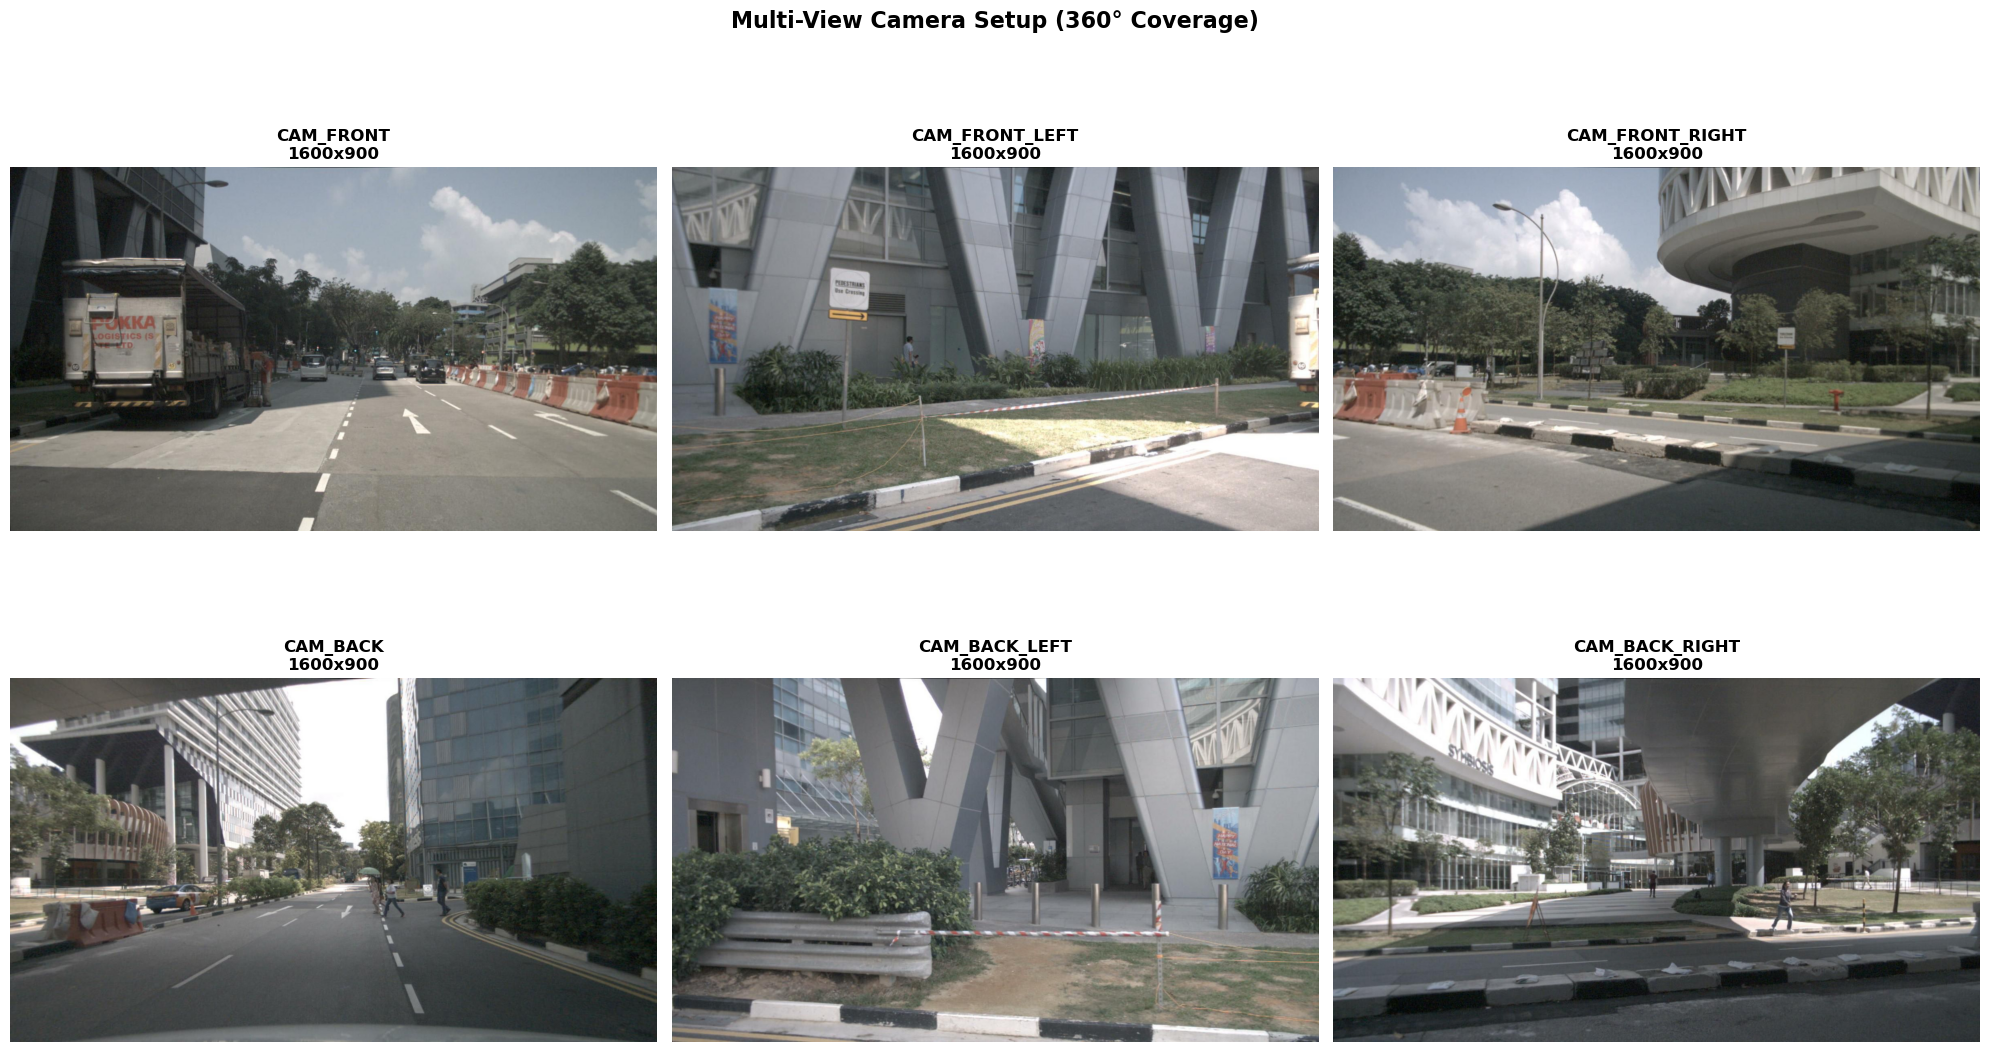

✅ Multi-view camera visualization saved!


In [3]:
# Get first sample
my_sample = nusc.sample[0]

cameras = ['CAM_FRONT', 'CAM_FRONT_LEFT', 'CAM_FRONT_RIGHT',
           'CAM_BACK', 'CAM_BACK_LEFT', 'CAM_BACK_RIGHT']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

for idx, cam in enumerate(cameras):
    # Get camera data
    cam_token = my_sample['data'][cam]
    cam_data = nusc.get('sample_data', cam_token)
    
    # Load image
    img_path = os.path.join('../data/nuscenes', cam_data['filename'])
    img = Image.open(img_path)
    
    # Plot
    ax = axes[idx // 3, idx % 3]
    ax.imshow(img)
    ax.set_title(f"{cam}\n{img.size[0]}x{img.size[1]}", 
                 fontsize=12, fontweight='bold')
    ax.axis('off')

plt.suptitle('Multi-View Camera Setup (360° Coverage)', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('../results/images/multiview_cameras.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Multi-view camera visualization saved!")

## 3. Camera Calibration
### Understanding Intrinsics & Extrinsics

In [4]:
# Get front camera calibration
cam_token = my_sample['data']['CAM_FRONT']
cam_data = nusc.get('sample_data', cam_token)
calib = nusc.get('calibrated_sensor', cam_data['calibrated_sensor_token'])

print("Camera Calibration for CAM_FRONT:")
print("\n1. Intrinsics (Camera Matrix):")
K = np.array(calib['camera_intrinsic'])
print(K)
print(f"\n   Focal length X (fx): {K[0,0]:.2f} pixels")
print(f"   Focal length Y (fy): {K[1,1]:.2f} pixels")
print(f"   Principal point (cx, cy): ({K[0,2]:.2f}, {K[1,2]:.2f}) pixels")

print("\n2. Extrinsics (Camera Position):")
print(f"   Translation (x,y,z): {calib['translation']} meters")
print(f"   Rotation (quaternion): {calib['rotation']}")

print("\n💡 What this means:")
print("   - fx/fy: How much the camera 'zooms' in each direction")
print("   - cx/cy: Image center (where camera optical axis points)")
print("   - Translation: Where camera is mounted on the vehicle")
print("   - Rotation: Which direction camera is pointing")

Camera Calibration for CAM_FRONT:

1. Intrinsics (Camera Matrix):
[[1.26641720e+03 0.00000000e+00 8.16267020e+02]
 [0.00000000e+00 1.26641720e+03 4.91507066e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

   Focal length X (fx): 1266.42 pixels
   Focal length Y (fy): 1266.42 pixels
   Principal point (cx, cy): (816.27, 491.51) pixels

2. Extrinsics (Camera Position):
   Translation (x,y,z): [1.70079118954, 0.0159456324149, 1.51095763913] meters
   Rotation (quaternion): [0.4998015430569128, -0.5030316162024876, 0.4997798114386805, -0.49737083824542755]

💡 What this means:
   - fx/fy: How much the camera 'zooms' in each direction
   - cx/cy: Image center (where camera optical axis points)
   - Translation: Where camera is mounted on the vehicle
   - Rotation: Which direction camera is pointing


## 4. Visualize 3D Bounding Boxes

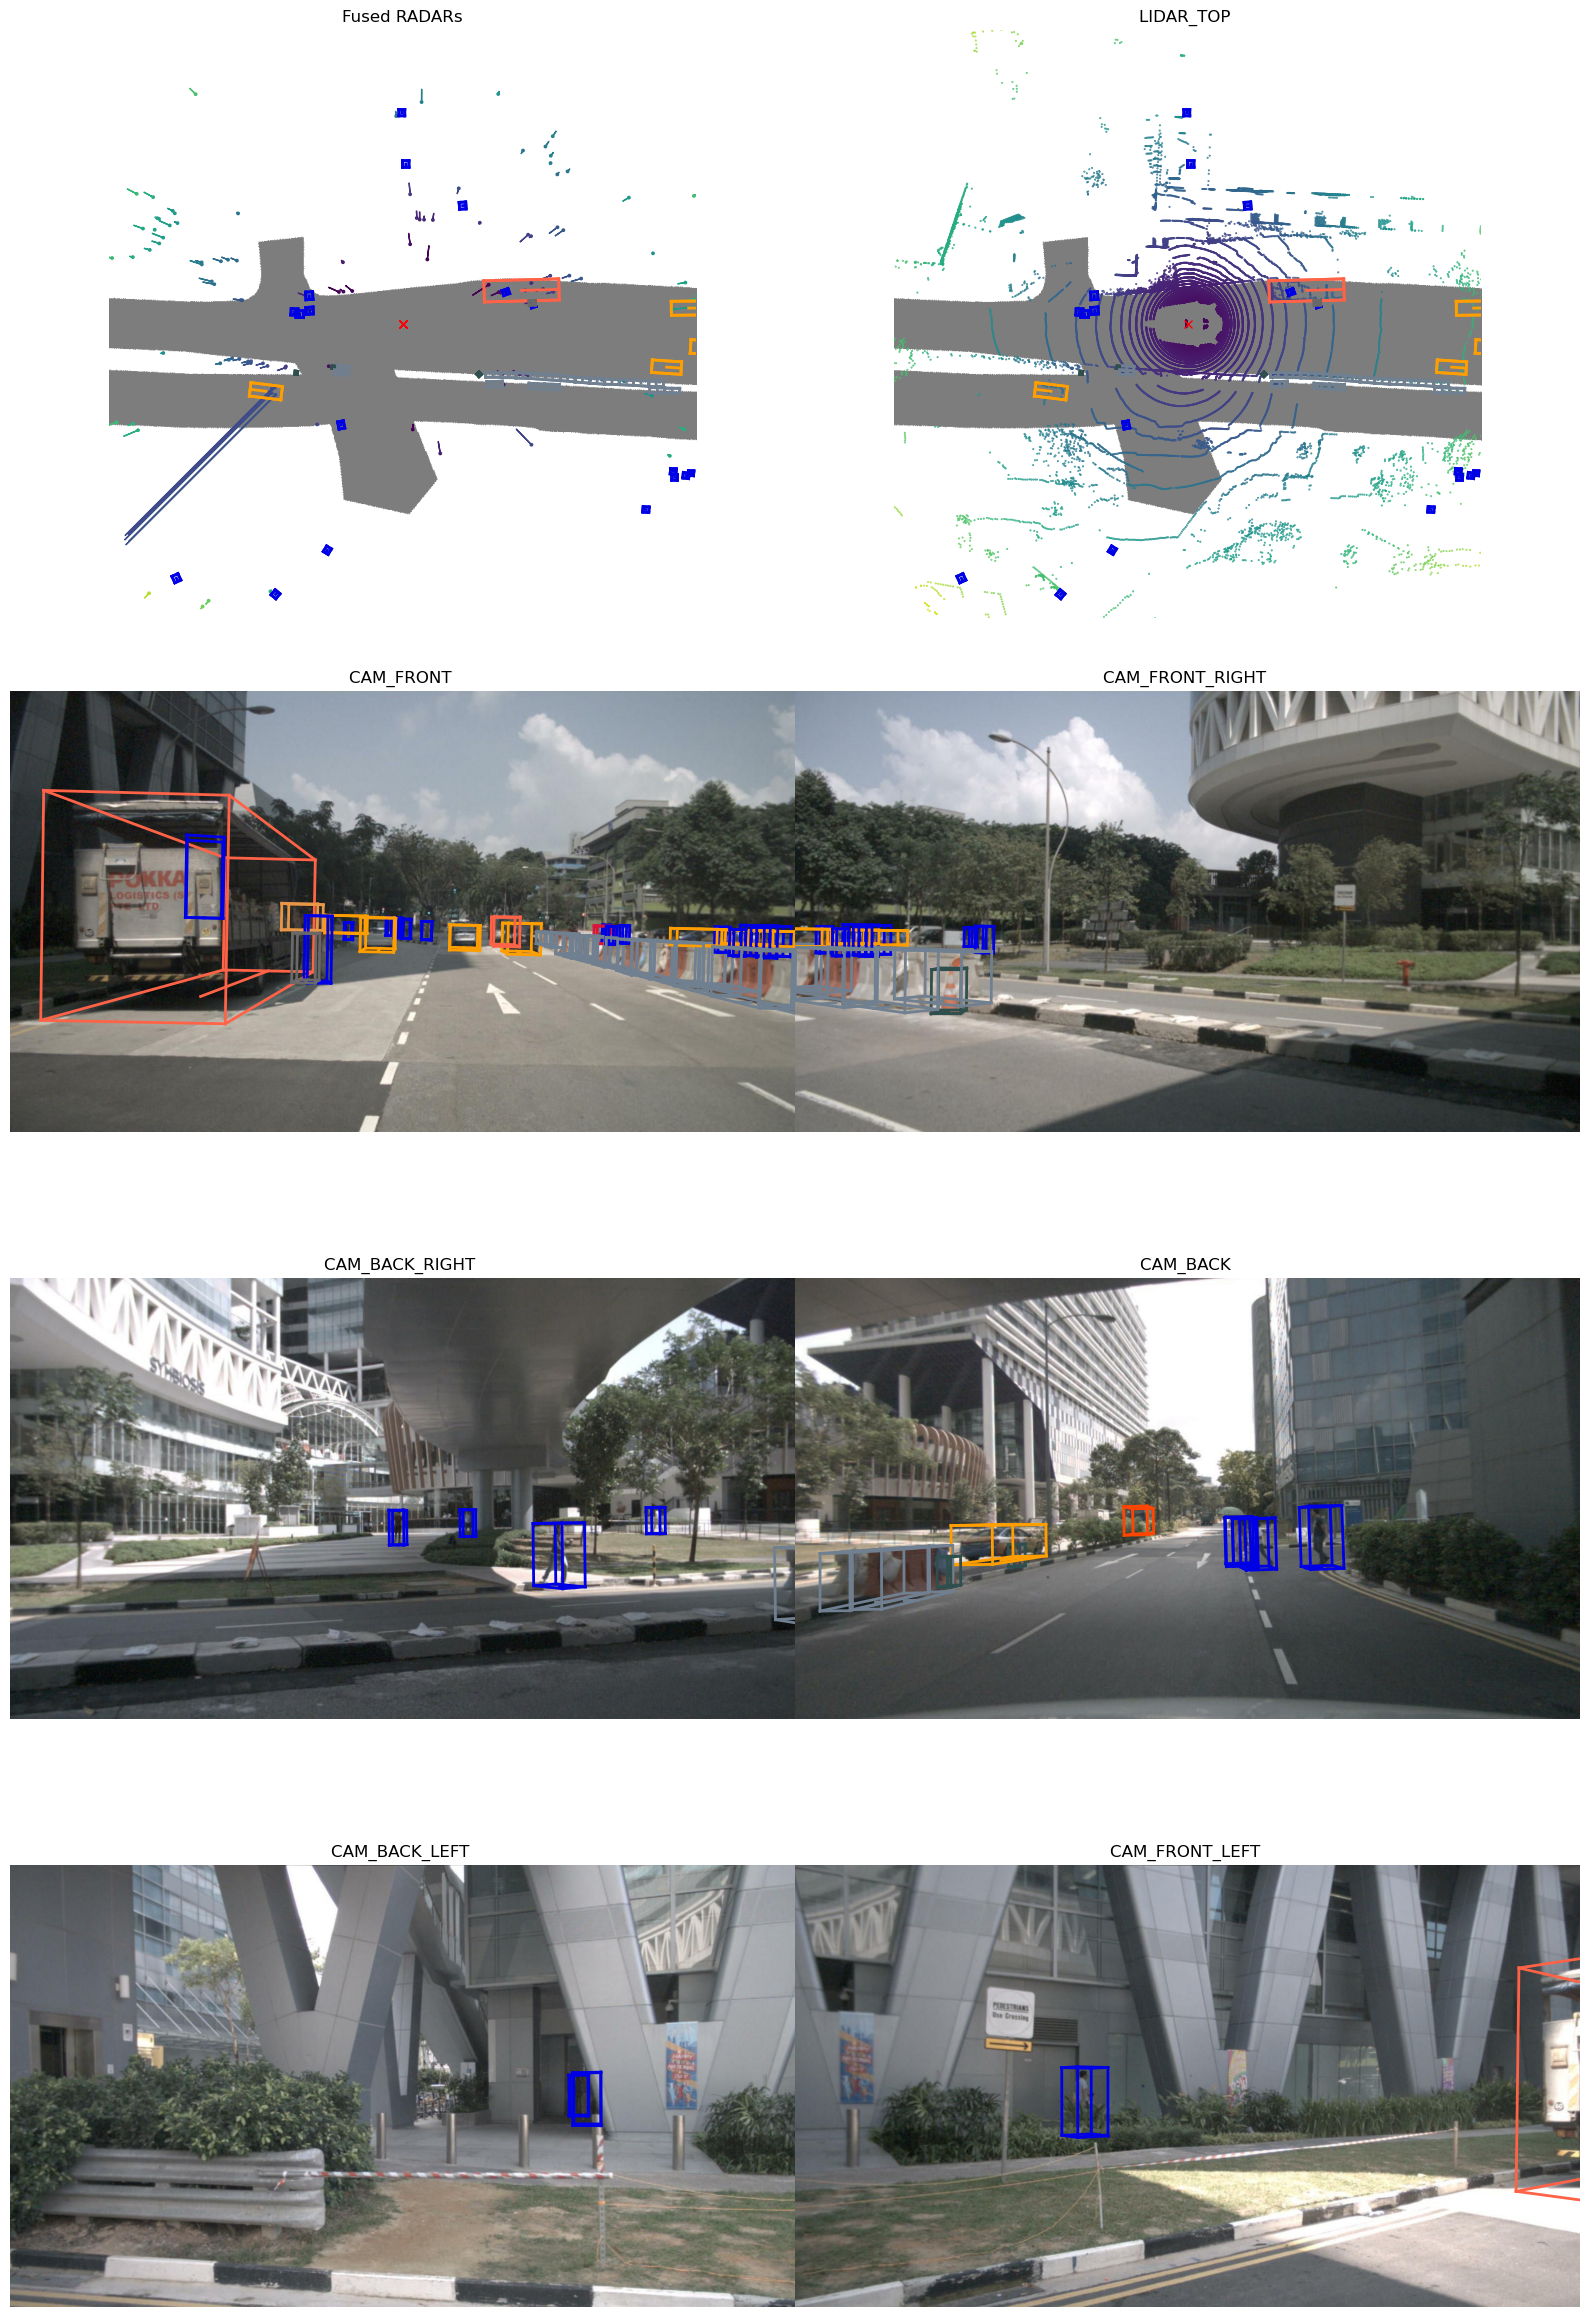

✅ Sample with 3D boxes saved!


<Figure size 640x480 with 0 Axes>

In [5]:
# Render sample with 3D boxes
nusc.render_sample(my_sample['token'])
plt.savefig('../results/images/sample_with_boxes.png', dpi=150, bbox_inches='tight')
print("✅ Sample with 3D boxes saved!")

## 5. Test Custom Dataset Loader

In [6]:
from src.data.dataset import NuScenesMultiViewDataset

# Create dataset
dataset = NuScenesMultiViewDataset(
    data_root='../data/nuscenes',
    version='v1.0-mini',
    split='train',
    image_size=(224, 400)
)

print(f"Dataset size: {len(dataset)}")

# Load one sample
sample = dataset[0]
print(f"\nSample 0:")
print(f"  Images: {sample['images'].shape}")  # (6, 3, 224, 400)
print(f"  Intrinsics: {sample['intrinsics'].shape}")  # (6, 3, 3)
print(f"  Extrinsics: {sample['extrinsics'].shape}")  # (6, 4, 4)

Loading nuScenes v1.0-mini (train split)...
Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.635 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.
Loaded 323 samples for train
Dataset size: 323

Sample 0:
  Images: torch.Size([6, 3, 224, 400])
  Intrinsics: torch.Size([6, 3, 3])
  Extrinsics: torch.Size([6, 4, 4])


In [7]:
# Visualize loaded images
from src.utils.visualization import plot_multiview_cameras

# Convert tensor to numpy for visualization
images_np = sample['images'].numpy()  # (6, 3, 224, 400)
images_np = images_np.transpose(0, 2, 3, 1)  # (6, 224, 400, 3)

plot_multiview_cameras(
    images_np, 
    dataset.cameras,
    save_path='../results/images/loaded_cameras.png'
)

Saved to: ../results/images/loaded_cameras.png


## ✅ Summary

**What we learned:**
- nuScenes has 404 samples in mini dataset
- Each sample has 6 synchronized cameras
- Camera calibration includes intrinsics (K matrix) and extrinsics (pose)
- We can load and process images programmatically

**Next steps:**
- Implement camera-to-BEV transformation (IPM)
- Understand depth estimation
- Build neural view transformer